# Quickstart

If you have a working version of Python installed on your system, it is easy to install Lightkurve and its dependencies using the ``pip`` package manager.  In a terminal window or Jupyter notebook cell, type:
```
! python -m pip install lightkurve --upgrade
```

See our [installation instructions](about/install.rst) page for details and troubleshooting information.

With Lightkurve installed, it is easy to extract brightness time series data (astronomers call this a *light curve*)
from the tiny images of stars collected by NASA's Kepler and TESS planet-hunting telescopes.

For example, let's download and display the pixels of a famous star named [KIC 8462852](https://en.wikipedia.org/wiki/KIC_8462852), also known as *Tabby's Star* or *Boyajian's Star*, which is known to show unusual light fluctuations.

First, we start Python and use the `search_targetpixelfile` function to obtain the Kepler pixel data for the star  from the [data archive](https://archive.stsci.edu/kepler/):

In [9]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("HAT-P-11").download_all();

<AxesSubplot:title={'center':'Target ID: 10748390, Cadence: 168251'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

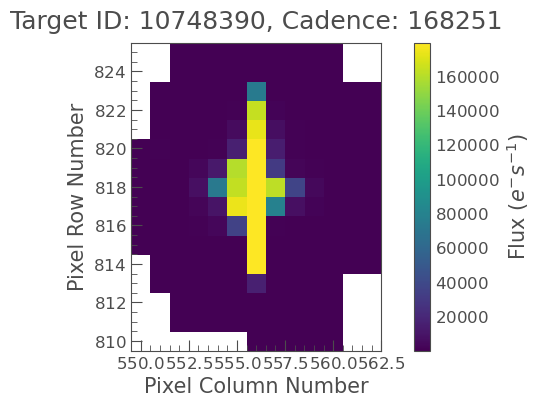

In [11]:
kepler_data = pixelfile[:52]
kepler_data[6].plot(frame=1)

It looks like the star is an isolated object, so we can extract a light curve by simply summing up all the pixel values in each image:

In [16]:
lc = kepler_data[46].to_lightcurve(aperture_mask='all');

The above method returned a `LightCurve` object which gives us access to the number of photons received by the spacecraft over time (known as the *flux*).  The time is an [AstroPy Time object](https://docs.astropy.org/en/stable/time/) in units of *days*:

In [17]:
lc.time

<Time object: scale='tdb' format='bkjd' value=[1472.10805605 1472.10873713 1472.1094182  ... 1477.31641582 1477.3170969
 1477.31777798]>

The flux is an [AstroPy Quantity object](https://docs.astropy.org/en/stable/units/) in units *electrons/second*:

In [18]:
lc.flux

<Quantity [2711407.2, 2711262.8, 2710963. , ..., 2713844.5, 2714146. ,
           2714201. ] electron / s>

We can plot these data using the `plot()` method:

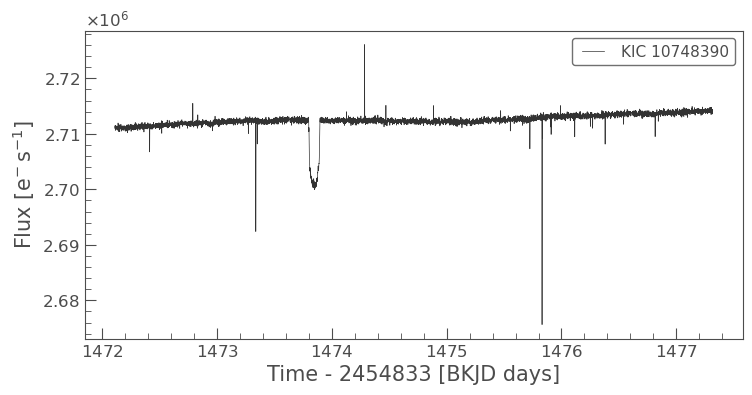

In [19]:
lc.plot();

In [20]:
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1472.1080560490154,2711407.25,239.9033966064453,551.576147497301,821.091640889548,1989850,0
1472.1087371264875,2711262.75,239.87362670898438,551.5746106065747,821.0917994345003,1989851,0
1472.109418203967,2710963.0,239.88584899902344,551.575936135856,821.0915487844617,1989852,0
1472.110099381498,2711277.5,239.90199279785156,551.5757827843911,821.0917741962688,1989853,0
1472.1107803589694,2711167.5,239.87208557128906,551.5750045466883,821.0917243266758,1989854,0
1472.1114614364415,2711487.0,239.8589630126953,551.5733004106784,821.0908273517954,1989855,128
1472.1121426139725,2710629.25,239.8773193359375,551.5752877959135,821.0909888214505,1989856,0
1472.112823691452,2710923.5,239.8675537109375,551.5743419180046,821.0909944078309,1989857,0


In [21]:
period = 4.888 #days

In [2]:
import lightkurve as lk
%matplotlib inline

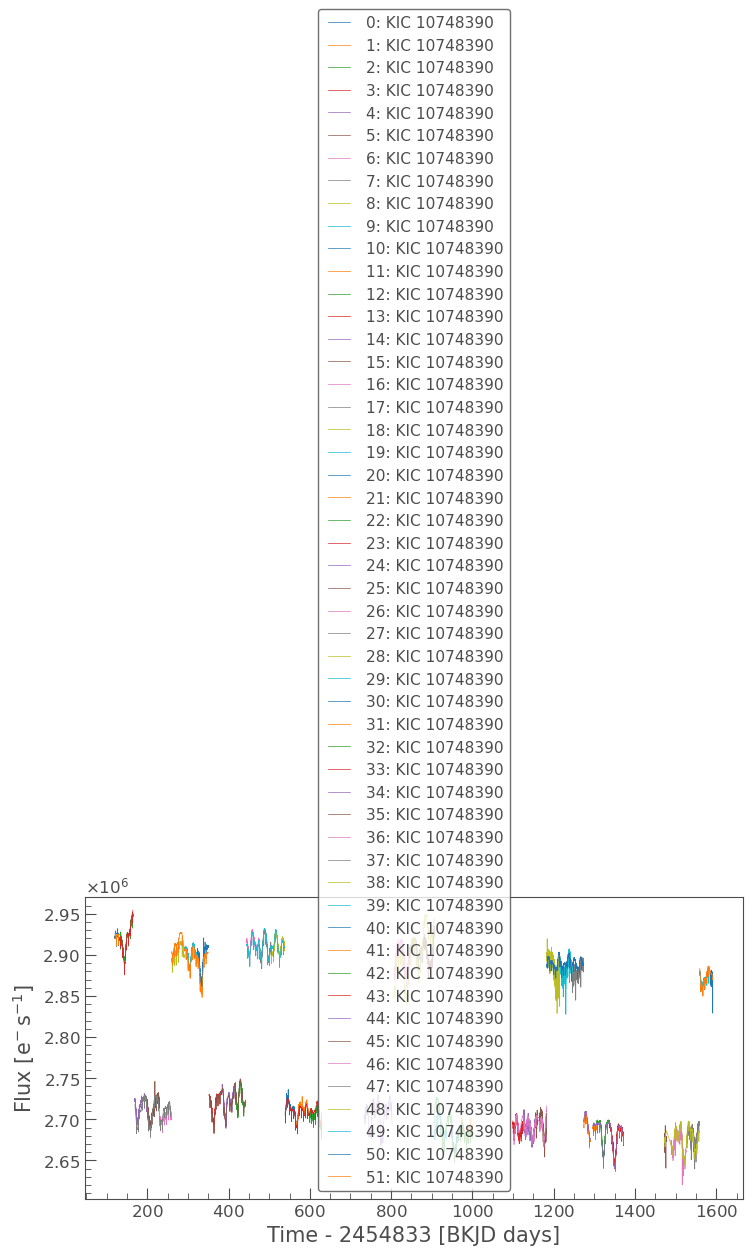

In [3]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('HAT-P-11', author='Kepler')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [5]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,60,kplr010748390,0.0
1,Kepler Quarter 00,2009,Kepler,1800,kplr010748390,0.0
2,Kepler Quarter 01,2009,Kepler,60,kplr010748390,0.0
3,Kepler Quarter 01,2009,Kepler,1800,kplr010748390,0.0
4,Kepler Quarter 02,2009,Kepler,60,kplr010748390,0.0
5,Kepler Quarter 02,2009,Kepler,60,kplr010748390,0.0
6,Kepler Quarter 02,2009,Kepler,60,kplr010748390,0.0
7,Kepler Quarter 02,2009,Kepler,1800,kplr010748390,0.0
8,Kepler Quarter 03,2009,Kepler,60,kplr010748390,0.0


In [64]:
search_result[3]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr010748390,0.0


In [65]:
search_result[44]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 14,2012,Kepler,1800,kplr010748390,0.0


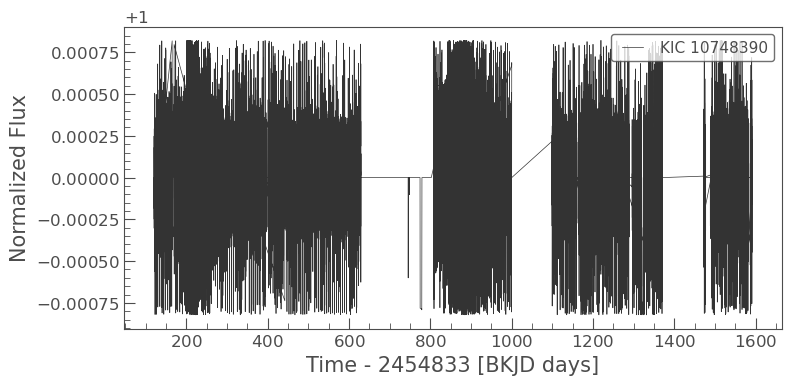

In [6]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

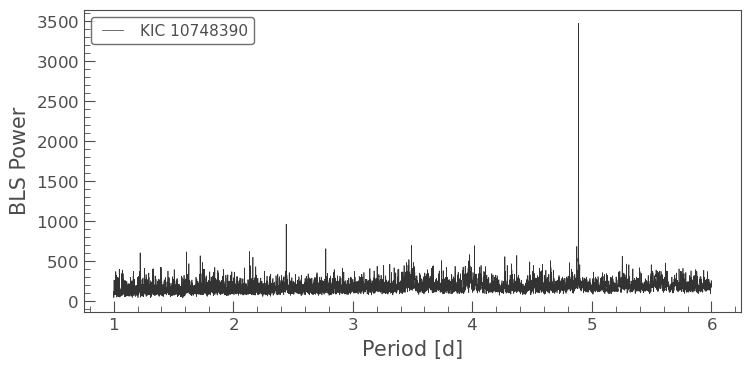

In [7]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 6, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [8]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 4.88788879 d>

In [9]:
planet_b_dur

<Quantity 0.1 d>

In [10]:
planet_b_t0

<Time object: scale='tdb' format='bkjd' value=124.80859840558085>

(-0.5, 0.5)

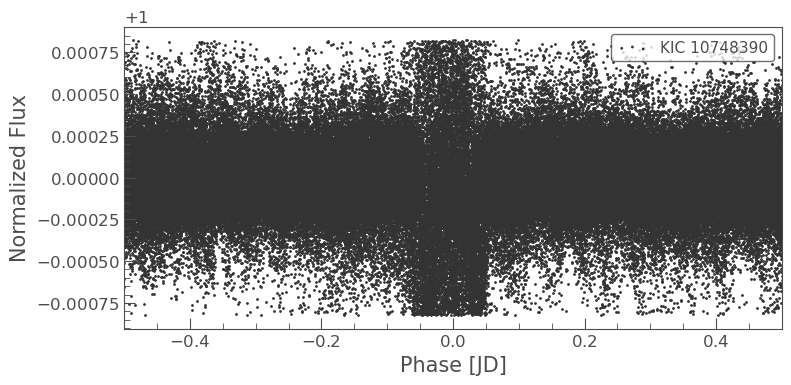

In [11]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-0.5, 0.5)

In [12]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

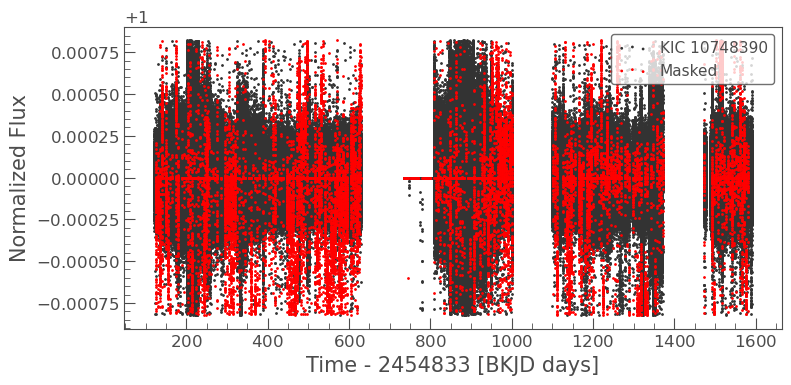

In [13]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');

In [14]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

(0.9, 1.0)

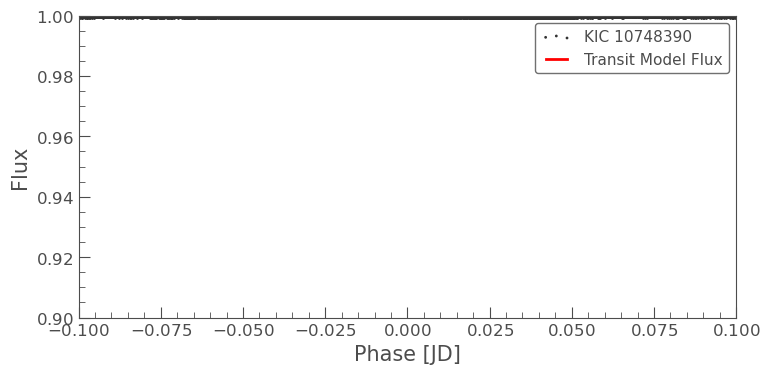

In [17]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-0.1, 0.1);
ax.set_ylim(0.9,1)

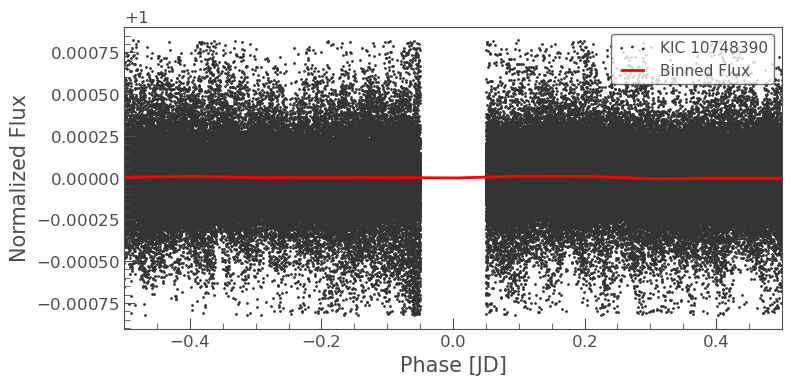

In [16]:
ax = masked_lc.fold(planet_b_period, planet_b_t0).scatter()
masked_lc.fold(planet_b_period, planet_b_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-0.5, 0.5);

In [38]:
tpf = lk.search_targetpixelfile("HAT-P-11", author="Kepler", quarter=6, cadence="long").download()

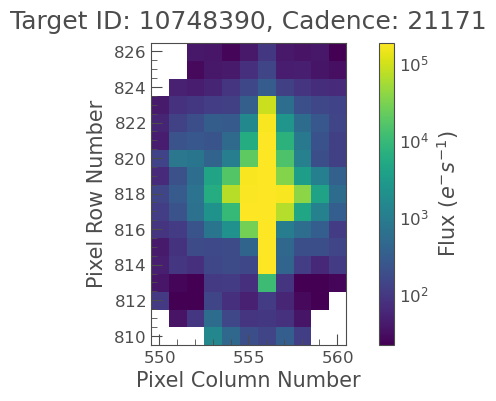

In [39]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [40]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [71]:
lc[3:40]

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
539.5311407379195,2700559.0,41.422733306884766,555.8565386141963,818.1297720846754,21073,0
539.5515749821643,2700716.75,41.42431640625,555.85667508281,818.1297862169979,21074,128
539.5720093261771,2700694.0,41.423763275146484,555.8563473000635,818.1295937765725,21075,0
539.592443470181,2700781.75,41.42350769042969,555.8565502896781,818.1293794108534,21076,8192
539.6128777139602,2700794.5,41.42374801635742,555.8564377292257,818.129666677423,21077,0
539.6333120577328,2701041.0,41.42538070678711,555.8565748127866,818.1294583743226,21078,0
539.6537462012784,2701051.0,41.42592239379883,555.8563632586655,818.1295477934353,21079,0
539.6741804445919,2701027.25,41.4257926940918,555.8565253487019,818.1291439051118,21080,0


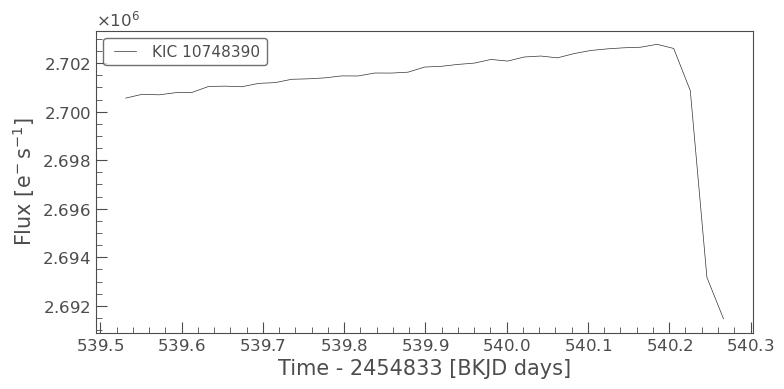

In [72]:
lc[3:40].plot();

In [73]:
flat, trend = lc[3:40].flatten(window_length=301, return_trend=True)

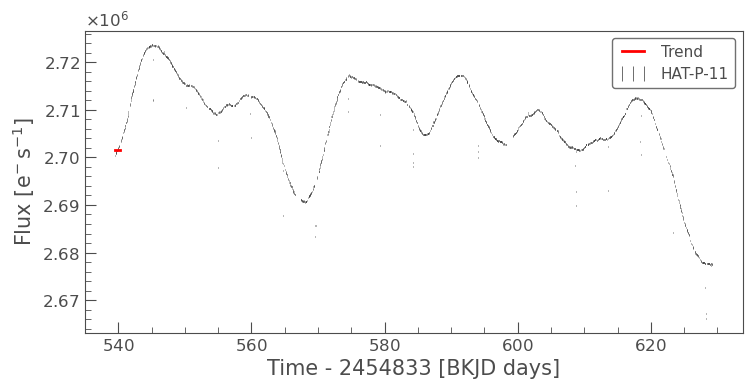

In [75]:
ax = lc.errorbar(label="HAT-P-11")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

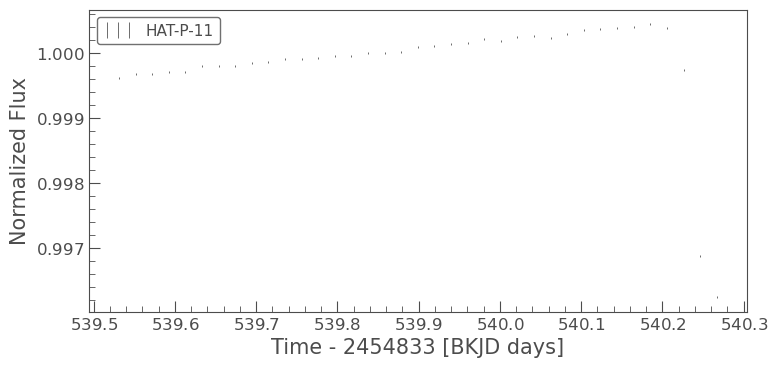

In [76]:
flat.errorbar(label="HAT-P-11");

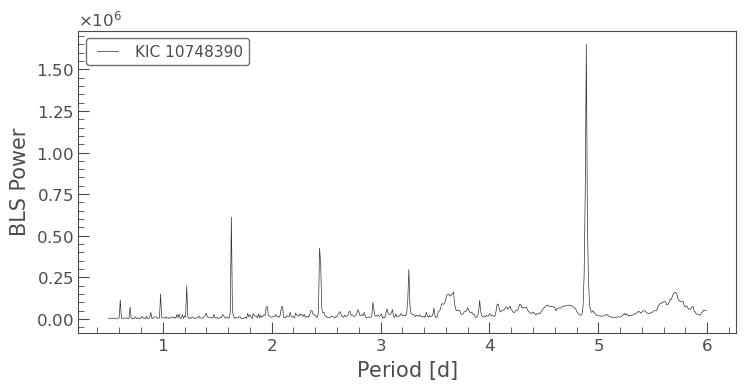

In [45]:
import numpy as np
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.01))
periodogram.plot();

In [46]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 4.890 d


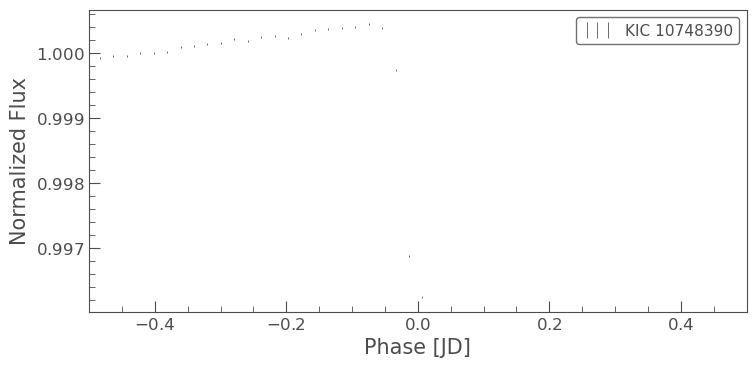

In [77]:
import matplotlib.pyplot as plt
flat.fold(period=best_fit_period, epoch_time=periodogram.transit_time_at_max_power).errorbar();
plt.xlim(-0.5, 0.5);

In [53]:
period = periodogram.period_at_max_power
period

<Quantity 4.89 d>

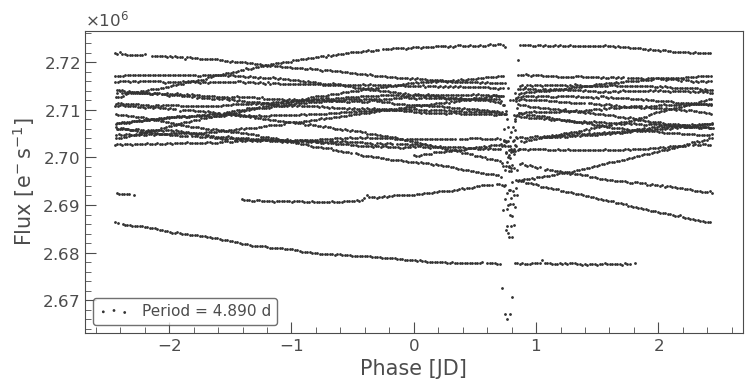

In [70]:
lc.fold(period).scatter(label=f'Period = {period.value:.3f} d');

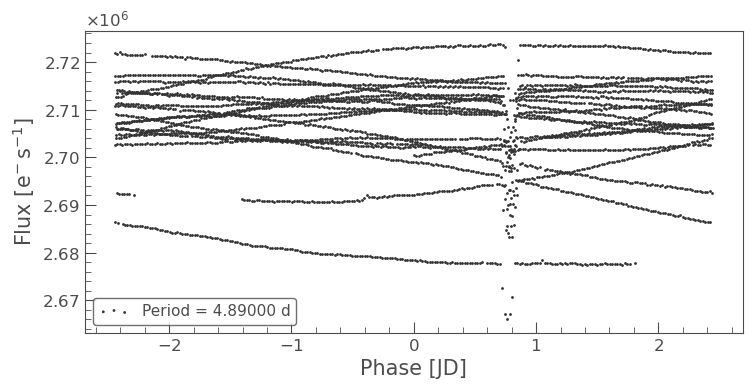

In [56]:
lc.fold(period).scatter(label=fr'Period = {period.value:.5f} d');

In [57]:
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
539.469838004261,2700468.75,41.42259216308594,555.8565854921111,818.1302151593402,21070,393216
539.4902722489715,2700349.75,41.42128372192383,555.8566341243953,818.1299699409791,21071,0
539.5107065934426,2700367.5,41.42153549194336,555.856583183681,818.1300239588508,21072,0
539.5311407379195,2700559.0,41.422733306884766,555.8565386141963,818.1297720846754,21073,0
539.5515749821643,2700716.75,41.42431640625,555.85667508281,818.1297862169979,21074,128
539.5720093261771,2700694.0,41.423763275146484,555.8563473000635,818.1295937765725,21075,0
539.592443470181,2700781.75,41.42350769042969,555.8565502896781,818.1293794108534,21076,8192
539.6128777139602,2700794.5,41.42374801635742,555.8564377292257,818.129666677423,21077,0


In [59]:
flat

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,,,pix,pix,,
Time,float64,float64,float64,float64,int32,int32
539.469838004261,0.999606427019928,1.533300074294361e-05,555.8565854921111,818.1302151593402,21070,393216
539.4902722489715,0.9995623779396283,1.5332516409919938e-05,555.8566341243953,818.1299699409791,21071,0
539.5107065934426,0.9995689482856394,1.533260960519563e-05,555.856583183681,818.1300239588508,21072,0
539.5311407379195,0.9996398339904913,1.5333052988779983e-05,555.8565386141963,818.1297720846754,21073,0
539.5515749821643,0.9996982267839137,1.5333638989377138e-05,555.85667508281,818.1297862169979,21074,128
539.5720093261771,0.9996898056362093,1.533343424218054e-05,555.8563473000635,818.1295937765725,21075,0
539.592443470181,0.9997222872059262,1.5333339634855217e-05,555.8565502896781,818.1293794108534,21076,8192
539.6128777139602,0.999727006750244,1.5333428593982015e-05,555.8564377292257,818.129666677423,21077,0
